<a href="https://colab.research.google.com/github/gulabpatel/Computer_Vision/blob/main/02_panorama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2              # open computer vision library
from skimage import io  # for loading images from url

url_1 = "https://raw.githubusercontent.com/phoolpreet/CV_Stuff/main/yard-00.png"
url_2 = "https://raw.githubusercontent.com/phoolpreet/CV_Stuff/main/yard-01.png"
image_1 = io.imread(url_1)
image_2 = io.imread(url_2)

orb1 = cv2.ORB_create(nfeatures=1000, scaleFactor=2, nlevels=6)
keypoints_1, descriptors_1 = orb1.detectAndCompute(image_1, mask=None)
orb2 = cv2.ORB_create(nfeatures=1000, scaleFactor=2, nlevels=4)
keypoints_2, descriptors_2 = orb2.detectAndCompute(image_2, mask=None)

matcher = cv2.BFMatcher()
matches = matcher.match(descriptors_1, descriptors_2)

Compute Homography

In [ ]:
kp_1 = np.array([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
kp_2 = np.array([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
H, mask = cv2.findHomography(kp_1, kp_2, cv2.RANSAC, ransacReprojThreshold=5.0)

print(H)

[[ 6.90063685e-01 -2.06646122e-02  2.95608070e+02]
 [-8.64579175e-02  8.69431071e-01  4.21223103e+01]
 [-2.72541098e-04 -2.00264397e-05  1.00000000e+00]]


Warp and Stitch Image

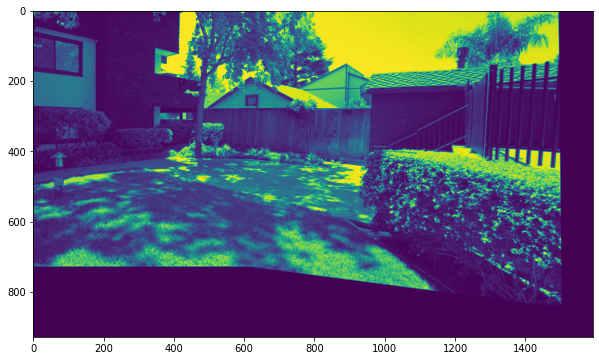

In [ ]:
width = image_2.shape[1]
height = image_2.shape[0]
warped = cv2.warpPerspective(image_1, H, dsize=(width+500, height+200))
warped[0:height, 0:width] = image_2
plt.figure(figsize = (12, 6))
plt.imshow(warped)
plt.show()

In [ ]:
def WarpImages(image_1, image_2):
  orb = cv2.ORB_create(nfeatures=1000, scaleFactor=2, nlevels=6)
  
  keypoints_1, descriptors_1 = orb.detectAndCompute(image_1, mask=None)
  keypoints_2, descriptors_2 = orb.detectAndCompute(image_2, mask=None)
  matcher = cv2.BFMatcher()
  matches = matcher.match(descriptors_1, descriptors_2)

  kp_1 = np.array([keypoints_1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
  kp_2 = np.array([keypoints_2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

  H, mask = cv2.findHomography(kp_1, kp_2, cv2.RANSAC, ransacReprojThreshold=5.0)
  width = image_2.shape[1]
  height = image_2.shape[0]
  warped = cv2.warpPerspective(image_1, H, dsize=(3*width, 2*height))
  warped[0:height, 0:width] = image_2

  return warped

Exercise: Stitch three images using WarpImages function

In [ ]:
url_1 = "https://raw.githubusercontent.com/phoolpreet/CV_Stuff/main/yard-00.png"
url_2 = "https://raw.githubusercontent.com/phoolpreet/CV_Stuff/main/yard-01.png"
url_3 = "https://raw.githubusercontent.com/phoolpreet/CV_Stuff/main/yard-02.png"

image_1 = io.imread(url_1)
image_2 = io.imread(url_2)
image_3 = io.imread(url_3)

